In [1]:
import sys
assert sys.version_info >= (3, 7)
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse('1.0.1')
import matplotlib.pyplot as plt
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
import numpy as np
np.random.seed(39)

# Code Example 1-1

In [2]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
lifesat = pd.read_csv('data/lifesat.csv')
# array n*1  not series
X = lifesat[['GDP per capita (USD)']].values
y = lifesat[['Life satisfaction']].values

# wrong
# X = lifesat['GDP per capita (USD)'].values
# y = lifesat['Life satisfaction'].values

# wrong
# X = lifesat['GDP per capita (USD)']
# y = lifesat['Life satisfaction']

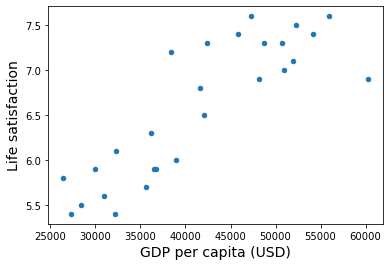

In [4]:
lifesat.plot(kind='scatter', 
             x='GDP per capita (USD)', y='Life satisfaction')
plt.show()

In [5]:
model = LinearRegression()
model.fit(X.reshape(-1, 1), y)

LinearRegression()

In [6]:
X_new = [[37_655.2]]
print(model.predict(X_new))

[[6.30165767]]


In [7]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X, y)
print(model.predict(X_new))

[[6.33333333]]


In [35]:
import os
os.getcwd()
images_path = os.getcwd() + '\\img\\'
def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=200):
    path = images_path + fig_id + '.' + fig_extension
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

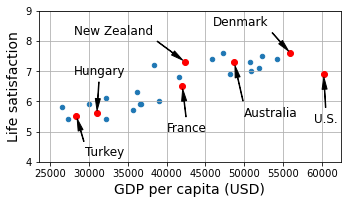

In [37]:
lifesat = pd.read_csv('data/lifesat.csv', index_col='Country')
lifesat.plot(kind='scatter', figsize=(5, 3), grid=True,
             x='GDP per capita (USD)', y='Life satisfaction')

min_life_sat = 4
max_life_sat = 9
min_gdp = 23_500
max_gdp = 62_500

position_text = {
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}

for country, pos_text in position_text.items():
    pos_data_x = lifesat['GDP per capita (USD)'].loc[country]
    pos_data_y = lifesat['Life satisfaction'].loc[country]
    country = 'U.S.' if country == 'United States' else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black',
                                 width=.5,
                                 shrink=.08,
                                 headwidth=5))
    plt.plot(pos_data_x, pos_data_y, 'ro')
plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])
save_fig('money_happy_scatterplot')
plt.show()

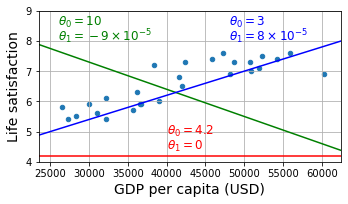

In [47]:
lifesat.plot(kind='scatter', figsize=(5, 3), grid=True,
             x='GDP per capita (USD)', y='Life satisfaction')
X = np.linspace(min_gdp, max_gdp, 1000)

w1, w2 = 4.2, 0
plt.plot(X, w1 + w2 * 1e-5 * X, "r")
plt.text(40_000, 4.9, fr"$\theta_0 = {w1}$", color="r")
plt.text(40_000, 4.4, fr"$\theta_1 = {w2}$", color="r")

w1, w2 = 10, -9
plt.plot(X, w1 + w2 * 1e-5 * X, "g")
plt.text(26_000, 8.5, fr"$\theta_0 = {w1}$", color="g")
plt.text(26_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="g")

w1, w2 = 3, 8
plt.plot(X, w1 + w2 * 1e-5 * X, "b")
plt.text(48_000, 8.5, fr"$\theta_0 = {w1}$", color="b")
plt.text(48_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])
save_fig('tweaking_model_params_plot')
plt.show()

In [49]:
gdp = "GDP per capita (USD)"
sat = "Life satisfaction"
from sklearn.linear_model import LinearRegression
X_sample = lifesat[[gdp]].values
y_sample = lifesat[[sat]].values

In [79]:
lin1 = LinearRegression()
lin1.fit(X_sample, y_sample)
t0, t1 =lin1.intercept_[0], lin1.coef_[0][0]
print("w0={:.2f}, w1={:.2e}".format(t0, t1))

w0=3.75, w1=6.78e-05
